In [1]:
import numpy as np
import torch
from PIL import Image
import matplotlib.pyplot as plt

In [4]:
x = np.random.randint(low = 0, high = 10_000, size = (1000, 1000))

In [7]:
torch.cuda.is_available()

True

In [6]:
torch.tensor(x, dtype = torch.int64)

tensor([[1232, 1760, 8934,  ..., 9463, 7398, 8399],
        [8798, 8473,  262,  ...,  394, 2295, 6018],
        [8497, 5185, 6297,  ..., 6622, 3612, 7022],
        ...,
        [8084, 6055, 7156,  ...,  975, 3881,  449],
        [ 854, 8900, 5579,  ..., 7298, 8918, 7517],
        [8596, 4798, 7250,  ..., 3537, 3218, 8941]])

In [10]:
y = torch.tensor(x, dtype = torch.float64, device = torch.device("cuda:0"))
y

tensor([[1232., 1760., 8934.,  ..., 9463., 7398., 8399.],
        [8798., 8473.,  262.,  ...,  394., 2295., 6018.],
        [8497., 5185., 6297.,  ..., 6622., 3612., 7022.],
        ...,
        [8084., 6055., 7156.,  ...,  975., 3881.,  449.],
        [ 854., 8900., 5579.,  ..., 7298., 8918., 7517.],
        [8596., 4798., 7250.,  ..., 3537., 3218., 8941.]], device='cuda:0',
       dtype=torch.float64)

In [11]:
y.sum()

tensor(5.0006e+09, device='cuda:0', dtype=torch.float64)

In [13]:
y.shape

torch.Size([1000, 1000])

In [14]:
y.flatten().shape

torch.Size([1000000])

In [35]:
with open(r"./girl.jpg", mode = "rb") as fp:
    girl = np.fromfile(fp, dtype = np.uint8)

In [37]:
girl.size

687321

In [38]:
girl.shape

(687321,)

In [39]:
torch.tensor(girl, device = torch.device("cuda:0"), dtype = torch.uint8)

tensor([255, 216, 255,  ...,  67, 255, 217], device='cuda:0',
       dtype=torch.uint8)

In [11]:
a = torch.randint(low = 0, high = 1000, size = (10, 1000, 1000), dtype = torch.int16, device = torch.device("cpu"))

In [12]:
a.shape

torch.Size([10, 1000, 1000])

In [21]:
a.sum(axis = 0, dtype = torch.float64)

tensor([[5598., 4356., 6186.,  ..., 3689., 5167., 4133.],
        [4428., 3610., 5176.,  ..., 4330., 4726., 5602.],
        [3657., 5937., 5236.,  ..., 6005., 4302., 4674.],
        ...,
        [5029., 3356., 3710.,  ..., 4690., 3016., 5553.],
        [6955., 5575., 5562.,  ..., 4786., 5347., 3426.],
        [4714., 5020., 5077.,  ..., 3457., 3297., 6259.]], dtype=torch.float64)

In [22]:
a.sum(axis = 1, dtype = torch.float64)

tensor([[491324., 513883., 497159.,  ..., 498501., 497906., 494807.],
        [501177., 487763., 520250.,  ..., 500850., 509529., 509093.],
        [495922., 502715., 493097.,  ..., 491693., 500219., 496179.],
        ...,
        [507741., 499541., 497928.,  ..., 495143., 491500., 488198.],
        [497772., 494901., 486846.,  ..., 500824., 480100., 508193.],
        [504049., 518410., 517358.,  ..., 485961., 491183., 490586.]],
       dtype=torch.float64)

In [23]:
a.sum(axis = 2, dtype = torch.float64)

tensor([[500584., 499916., 496332.,  ..., 512040., 502594., 509348.],
        [484695., 503753., 506567.,  ..., 505324., 510076., 509844.],
        [496040., 497004., 508211.,  ..., 469638., 500590., 493096.],
        ...,
        [497135., 504851., 506068.,  ..., 493056., 507394., 475873.],
        [510441., 497547., 501924.,  ..., 483607., 494603., 504564.],
        [497716., 503027., 485297.,  ..., 487402., 505230., 507853.]],
       dtype=torch.float64)

In [34]:
with open("./girl.bmp", "rb") as fp:
    image = np.fromfile(fp, dtype = np.uint8)[54:]

In [35]:
image.size

9437184

In [36]:
pic = Image.open("./girl.bmp")

h, w = pic.height, pic.width

In [37]:
h, w

(1152, 2048)

In [70]:
pixel_sums = np.array(np.hsplit(image, h * w)).sum(axis = 1) - 255

In [85]:
vfunc = np.vectorize(lambda val: (val / 3), otypes = [np.float64], cache = True)

In [86]:
bw_pixels = np.flip(vfunc(pixel_sums).reshape(h, w))

In [87]:
bw_pixels

array([[ 31.        ,  32.        ,  32.        , ...,  24.33333333,
         23.33333333,  22.33333333],
       [ 33.        ,  32.        ,  32.        , ...,  23.33333333,
         22.33333333,  21.33333333],
       [ 33.        ,  32.        ,  32.        , ...,  23.33333333,
         23.33333333,  21.33333333],
       ...,
       [214.66666667, 210.66666667, 210.66666667, ..., 162.66666667,
        160.        , 159.        ],
       [215.66666667, 212.66666667, 212.66666667, ..., 161.66666667,
        160.        , 158.66666667],
       [210.66666667, 208.66666667, 210.66666667, ..., 160.66666667,
        159.66666667, 159.66666667]])

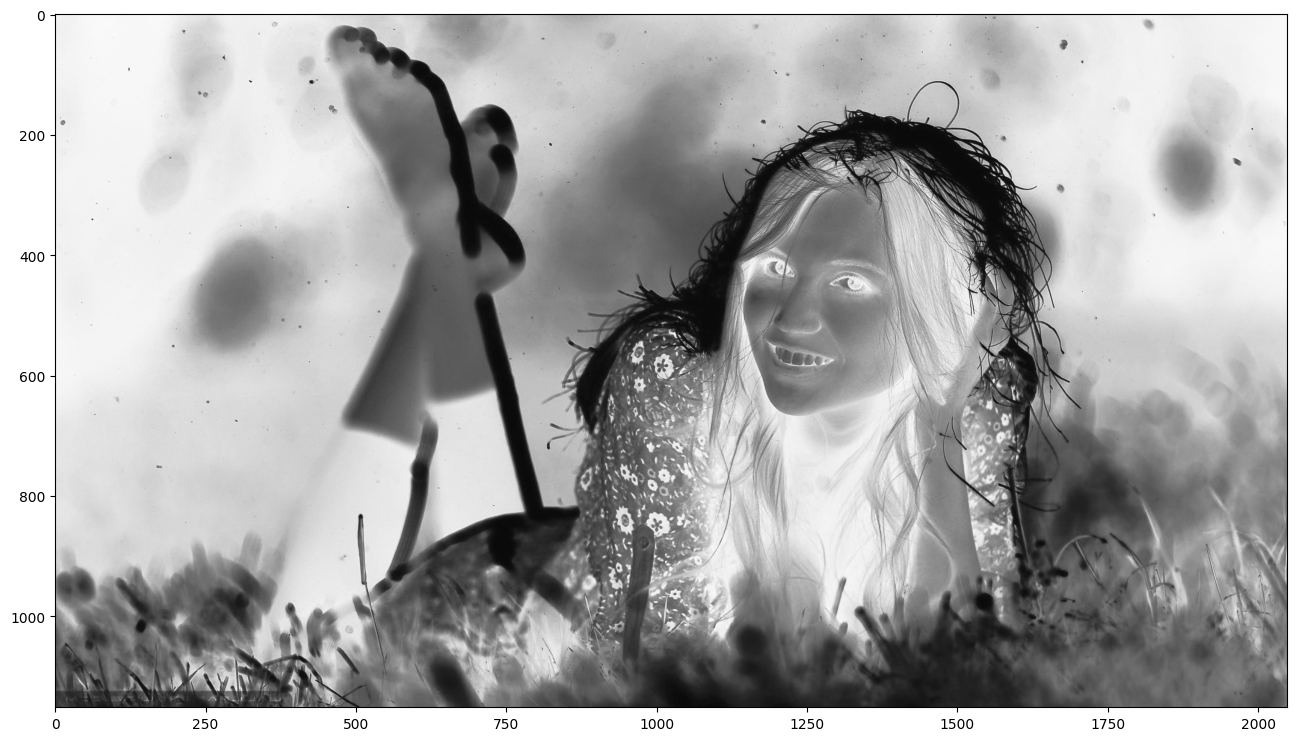

In [88]:
# that looks horrendous.

fig, axes = plt.subplots()
fig.set_size_inches(16, 9)
plt.imshow(bw_pixels, cmap = "Greys")
plt.show()